In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=50000)
fares = pd.read_csv(trip_fare_file, nrows=50000)

In [3]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [4]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

# Prepare Time

In [5]:
full_tripdata[" pickup_datetime"] = pd.to_datetime(full_tripdata[" pickup_datetime"])
full_tripdata[" dropoff_datetime"] = pd.to_datetime(full_tripdata[" dropoff_datetime"])

full_tripdata["weekday"] = full_tripdata[" pickup_datetime"].dt.dayofweek
full_tripdata["hourofday"] = full_tripdata[" pickup_datetime"].dt.hour

In [6]:
import seaborn as sns

In [7]:
full_tripdata[[" fare_amount"]].describe()

fare_amount
count  50000.000000
mean      12.522339
std        9.755557
min        2.500000
25%        6.500000
50%        9.500000
75%       15.000000
max      350.000000

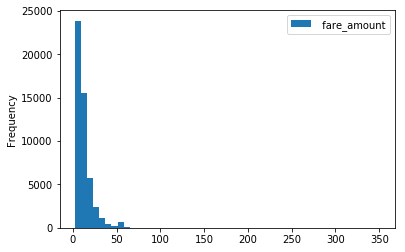

In [8]:
full_tripdata[[" fare_amount"]].plot.hist(bins=50)

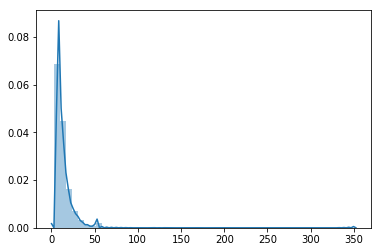

In [9]:
sns.distplot(full_tripdata[[" fare_amount"]])

In [10]:
full_tripdata = full_tripdata.drop(columns=['medallion',' hack_license',' vendor_id',' rate_code',' store_and_fwd_flag'])

In [11]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

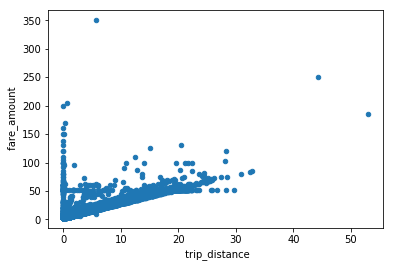

In [12]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

In [13]:
#check data whose trip distance is 0 

zero_distance = full_tripdata.loc[(full_tripdata[' trip_distance'] == 0)]

zero_distance.describe()

passenger_count   trip_time_in_secs   trip_distance  \
count        265.000000          265.000000           265.0   
mean           1.637736           62.818868             0.0   
std            1.211096          326.485761             0.0   
min            1.000000            0.000000             0.0   
25%            1.000000            0.000000             0.0   
50%            1.000000            0.000000             0.0   
75%            2.000000            0.000000             0.0   
max            6.000000         3600.000000             0.0   

        pickup_longitude   pickup_latitude   dropoff_longitude  \
count         265.000000        265.000000          265.000000   
mean          -28.471470         15.681316          -20.652789   
std            36.059938         19.860852           33.242449   
min           -74.095093          0.000000          -74.048233   
25%           -73.977303          0.000000          -73.809486   
50%             0.000000          0.000000            0.000000   
75%             0.000000         40.730572            0.000000   
max             0.000000         41.026131            0.000000   

        dropoff_latitude   fare_amount   surcharge     mta_tax   tip_amount  \
count         265.000000    265.000000  265.000000  265.000000   265.000000   
mean           11.377632     30.662868    0.135849    0.341509     4.311057   
std            18.313628     32.183460    0.250828    0.233090     6.776104   
min             0.000000      2.500000    0.000000    0.000000     0.000000   
25%             0.000000      4.500000    0.000000    0.000000     0.000000   
50%             0.000000     18.000000    0.000000    0.500000     1.000000   
75%            40.674305     52.000000    0.000000    0.500000     7.000000   
max            41.026146    199.000000    1.000000    0.500000    50.000000   

        tolls_amount   total_amount     weekday   hourofday  
count     265.000000     265.000000  265.000000  265.000000  
mean        0.751094      36.202377    4.716981    7.969811  
std         2.510965      35.702585    0.451318    8.823127  
min         0.000000       3.000000    4.000000    0.000000  
25%         0.000000       8.500000    4.000000    1.000000  
50%         0.000000      21.600000    5.000000    4.000000  
75%         0.000000      60.500000    5.000000   19.000000  
max        17.000000     219.330000    5.000000   23.000000

In [14]:
columnName = ' trip_distance'
print full_tripdata[columnName].describe()

#full_tripdata.astype(bool).sum(axis=0)

count    50000.000000
mean         3.124457
std          3.207894
min          0.000000
25%          1.170000
50%          2.070000
75%          3.840000
max         52.920000
Name:  trip_distance, dtype: float64


# Remove trips whose trip_time, trip_distance, hour, weekday, coordinates is 0

In [15]:
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]

full_tripdata = full_tripdata.loc[(full_tripdata[' trip_distance'] != 0) & (full_tripdata[' trip_time_in_secs'] != 0)]

full_tripdata = full_tripdata.loc[(full_tripdata['weekday'] != 0) & (full_tripdata['hourofday'] != 0)]

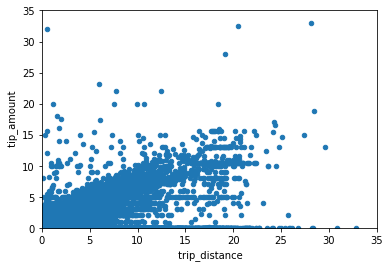

In [16]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,35))

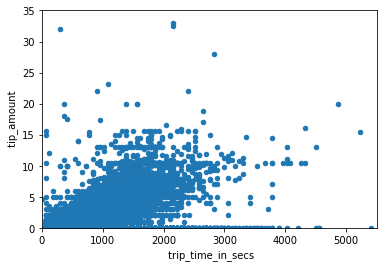

In [17]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,5500))

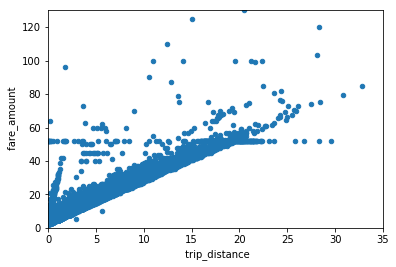

In [18]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,35))

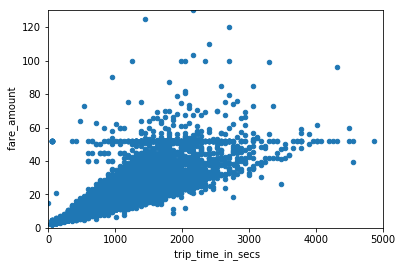

In [19]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,5000))

In [20]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

# Relationship with categorical features

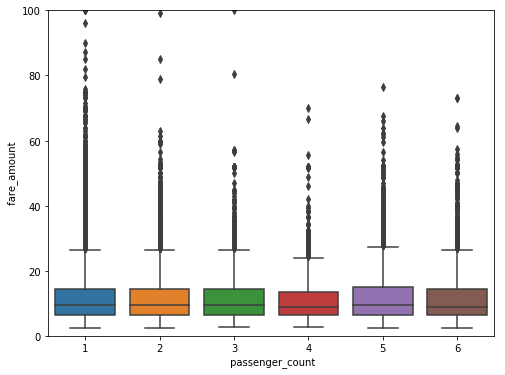

In [21]:

columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

# Conclusion , passenger_count has no correlation with fare_amount

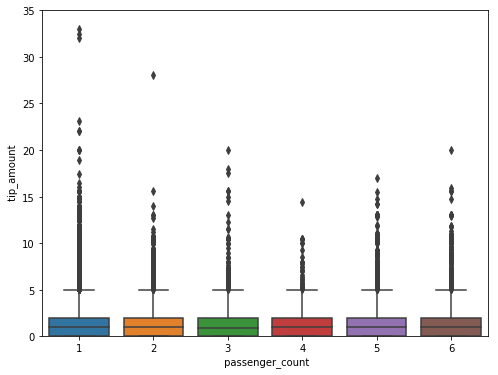

In [22]:
columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , passenger_count has no correlation with tip_amount

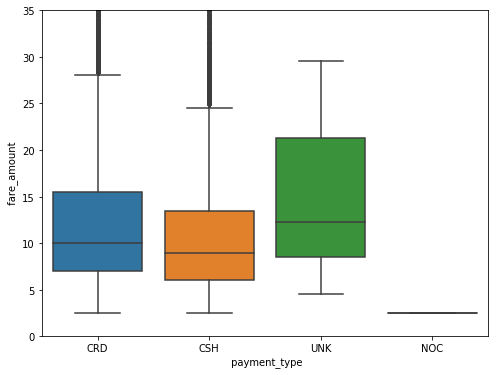

In [23]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , payment_tyep has some correlation with fare_amount, UNK is more frequently used for higher fare amount

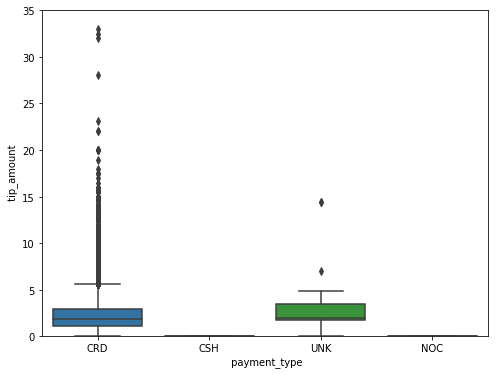

In [24]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# People are more willing to give tip when using card or "UNK"

In [25]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

In [26]:
full_tripdata.describe()

passenger_count   trip_time_in_secs   trip_distance  \
count      39865.000000        39865.000000    39865.000000   
mean           2.148050          698.415001        3.091756   
std            1.728021          466.530926        3.194793   
min            1.000000            1.000000        0.010000   
25%            1.000000          360.000000        1.160000   
50%            1.000000          600.000000        2.030000   
75%            3.000000          900.000000        3.750000   
max            6.000000         7500.000000       52.920000   

        pickup_longitude   pickup_latitude   dropoff_longitude  \
count       39865.000000      39865.000000        39865.000000   
mean          -73.972208         40.746794          -73.968496   
std             0.642095          0.168707            0.642950   
min           -75.316666         40.184036          -74.368393   
25%           -73.993599         40.728916          -73.992180   
50%           -73.984779         40.745922          -73.981720   
75%           -73.971779         40.763000          -73.961563   
max            -0.001667         73.972099            0.000000   

        dropoff_latitude   fare_amount     surcharge       mta_tax  \
count       39865.000000  39865.000000  39865.000000  39865.000000   
mean           40.747350     12.252145      0.540223      0.499247   
std             0.035171      9.298458      0.196373      0.019383   
min            40.188648      2.500000      0.000000      0.000000   
25%            40.727680      6.500000      0.500000      0.500000   
50%            40.747749      9.500000      0.500000      0.500000   
75%            40.766457     14.500000      0.500000      0.500000   
max            41.453693    350.000000      1.000000      0.500000   

         tip_amount   tolls_amount   total_amount       weekday     hourofday  
count  39865.000000   39865.000000   39865.000000  39865.000000  39865.000000  
mean       1.332474       0.174050      14.798140      4.345090     14.792098  
std        2.239738       1.026848      10.975839      0.490927      9.118207  
min        0.000000       0.000000       3.000000      1.000000      1.000000  
25%        0.000000       0.000000       8.300000      4.000000      4.000000  
50%        1.000000       0.000000      11.500000      4.000000     20.000000  
75%        2.000000       0.000000      17.300000      5.000000     22.000000  
max      188.250000      18.250000     350.500000      6.000000     23.000000

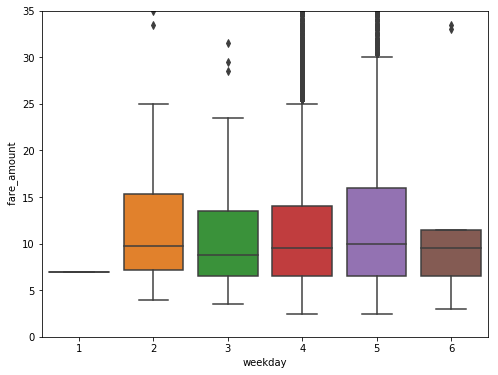

In [27]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

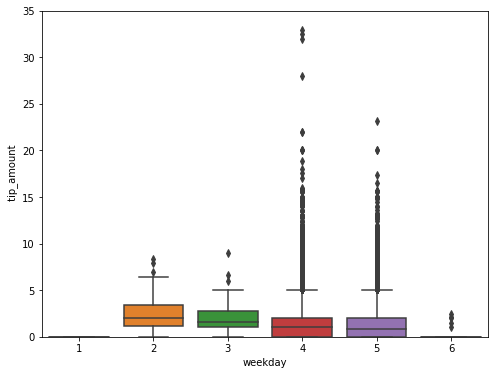

In [28]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

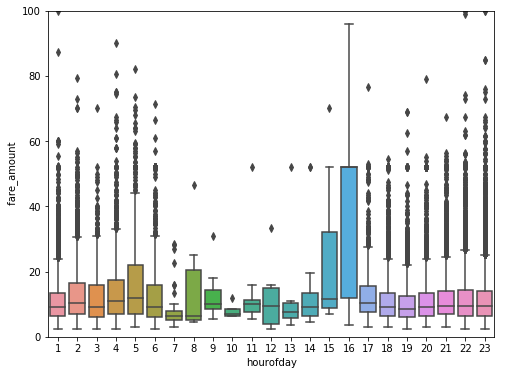

In [29]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

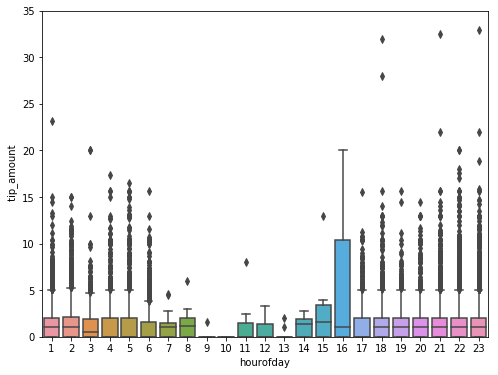

In [30]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation matrix

In [31]:
import numpy as np

In [32]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

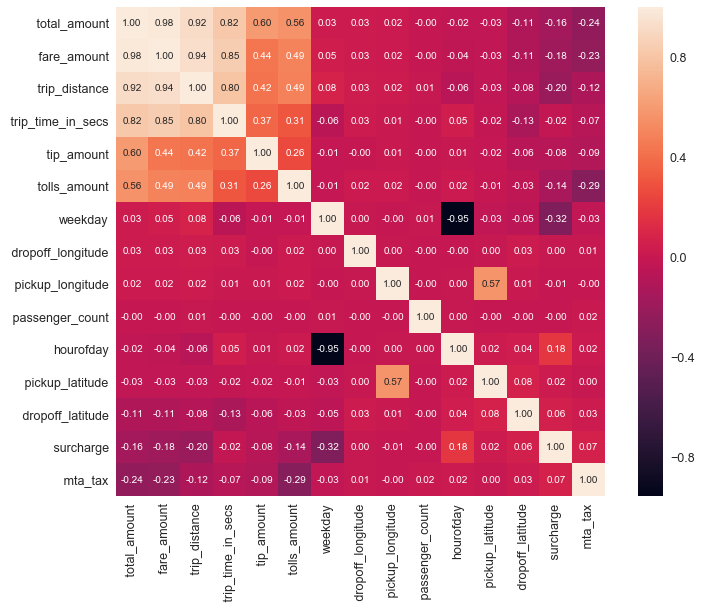

In [33]:
corrmat = full_tripdata.corr()

k = 18
cols = corrmat.nlargest(k, ' total_amount')[' total_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Process Coordinates 

In [34]:
import pickle
from sklearn.cluster import KMeans

model = pickle.load(open('location_cluster_kmean', 'rb'))

In [35]:
model.labels_

array([ 32,   3,  92, ...,  93,  86, 114])

In [36]:
pickupLocations = full_tripdata.iloc[:,5:7]

pickupLocations.columns

Index([u' pickup_longitude', u' pickup_latitude'], dtype='object')

In [37]:
full_tripdata["pickupLoc"] = model.predict(pickupLocations.as_matrix())

In [38]:
full_tripdata["pickupLoc"]

0         32
2          3
3         92
4         96
5        180
6        127
7        126
8        184
9         32
10       195
11        84
12        43
13       174
14       141
15         9
16        23
17       173
18        71
19        98
20        85
21        89
22       150
23       176
24        96
26        75
28        36
29       174
30       159
31        63
32       139
        ... 
49958    102
49959     84
49960    141
49961    154
49965     69
49972    157
49974    178
49976    107
49977     12
49978    182
49979     16
49980    133
49981    189
49982     79
49983    191
49984    130
49985    181
49986    141
49987     63
49988     14
49989     50
49990      5
49991    183
49992     52
49993     30
49995    119
49996    161
49997     27
49998     21
49999    142
Name: pickupLoc, Length: 39865, dtype: int32

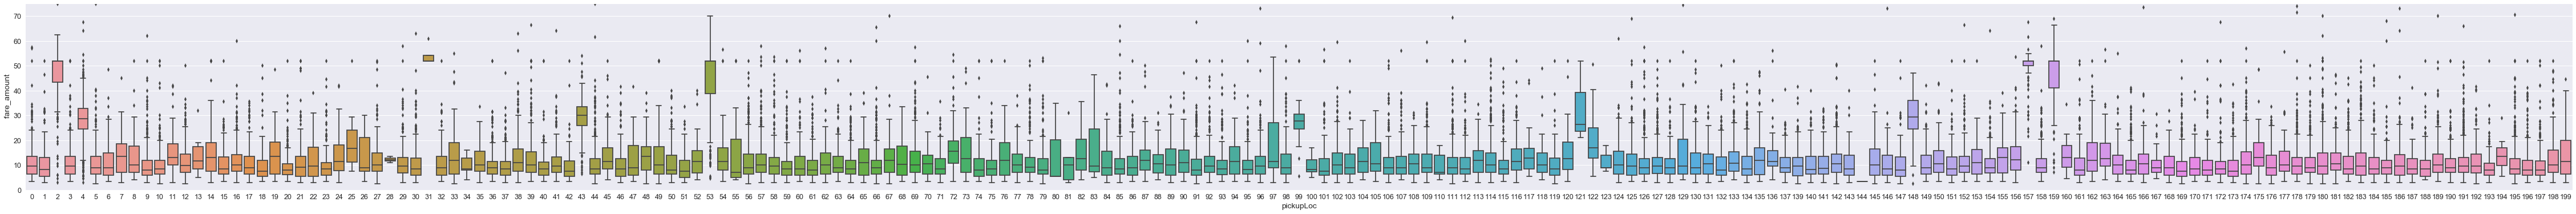

In [39]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

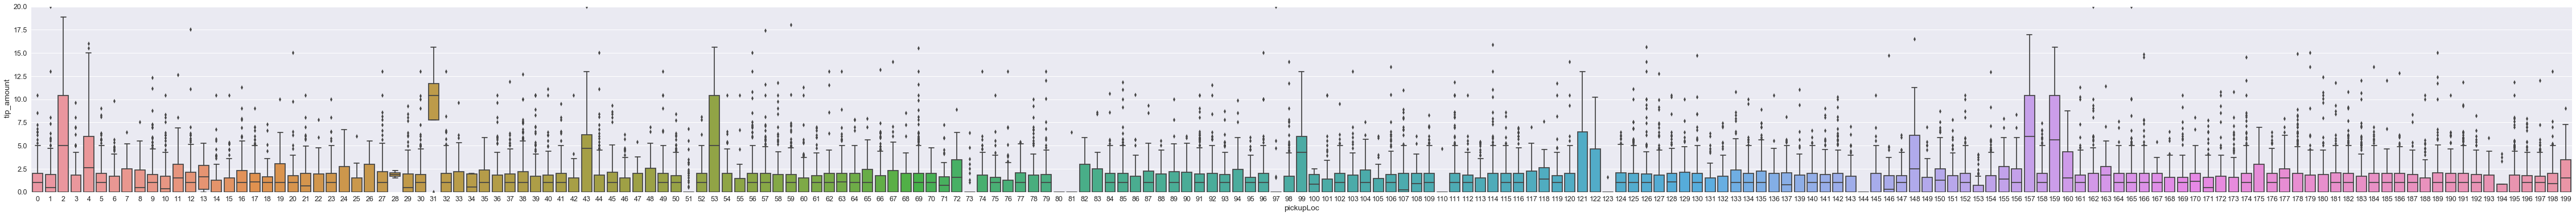

In [40]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=20);

In [41]:
data.groupby(by=['pickupLoc']).sum().sort_values(by=[" tip_amount"],ascending=False)

tip_amount
pickupLoc             
4              1220.82
53             1048.46
38              894.80
43              799.57
12              775.17
191             682.08
189             674.73
56              670.87
2               663.55
142             614.28
5               598.46
159             597.21
91              595.73
69              559.91
85              558.07
174             556.00
111             525.08
0               508.48
96              501.85
126             496.26
134             483.76
165             482.82
196             481.91
64              479.87
66              468.26
17              466.13
16              464.01
9               463.55
195             462.21
109             460.88
...                ...
136              67.35
122              66.35
120              63.50
88               48.90
51               44.95
117              44.42
82               43.52
105              42.58
68               39.25
153              38.70
31               36.40
26               34.92
55               33.60
13               33.45
97               33.35
83               32.90
47               31.88
160              26.15
73               24.48
121              13.00
25               11.81
194              11.10
34                8.80
100               8.25
81                6.40
110               4.62
28                3.80
123               1.60
144               0.00
80                0.00

[199 rows x 1 columns]

In [42]:
data.groupby(by=['pickupLoc']).count().sort_values(by=[" tip_amount"],ascending=False)

tip_amount
pickupLoc             
38                 627
191                598
12                 560
5                  519
56                 494
189                494
91                 478
142                467
66                 462
85                 444
195                433
127                426
196                422
36                 420
44                 416
111                412
64                 409
174                394
69                 386
0                  384
109                377
126                375
165                374
125                373
134                372
4                  370
9                  364
183                358
154                355
3                  349
...                ...
19                  55
118                 51
175                 51
105                 46
88                  43
117                 38
120                 34
82                  29
122                 28
68                  28
55                  27
47                  27
26                  25
99                  22
97                  21
83                  19
13                  18
194                 12
25                  10
160                 10
34                  10
100                  8
110                  5
123                  5
81                   5
31                   4
80                   3
121                  3
28                   2
144                  1

[199 rows x 1 columns]

In [43]:
dropoffLocations = full_tripdata.iloc[:,7:9]
print dropoffLocations.columns
full_tripdata["dropoffLoc"] = model.predict(dropoffLocations.as_matrix())

Index([u' dropoff_longitude', u' dropoff_latitude'], dtype='object')


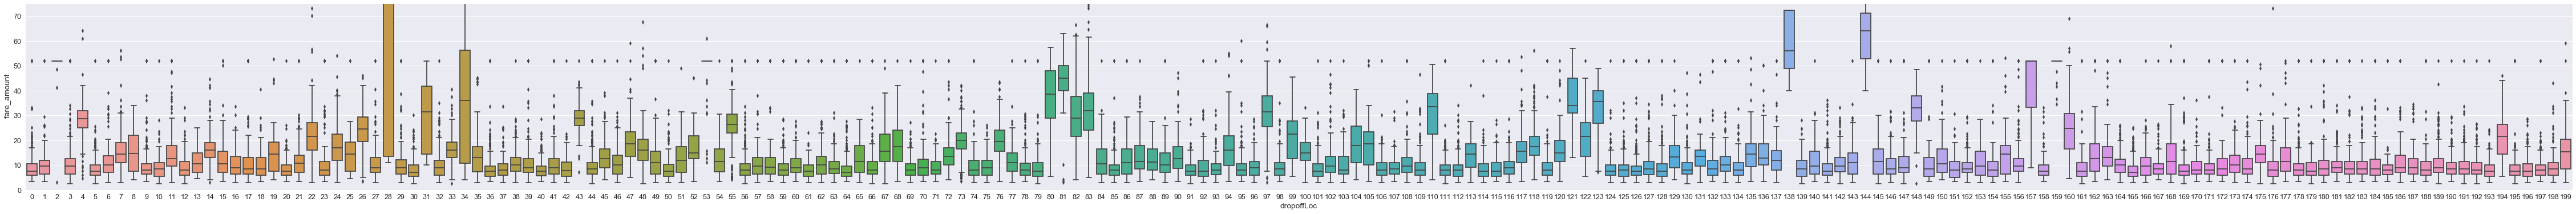

In [44]:
columnName = 'dropoffLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

In [45]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday', u'pickupLoc', u'dropoffLoc'],
      dtype='object')

In [46]:
training = full_tripdata.drop(columns=[' pickup_datetime',
                                       ' dropoff_datetime',
                                       ' trip_time_in_secs',
                                       ' trip_distance',
                                       ' dropoff_longitude',
                                       ' dropoff_latitude',
                                       ' surcharge',
                                       ' mta_tax',
                                       ' tolls_amount',
                                       ' total_amount',
                                       ' passenger_count',
                                       ' payment_type',
                                       ' pickup_longitude',
                                       ' pickup_latitude'])

In [47]:
training.columns

Index([u' fare_amount', u' tip_amount', u'weekday', u'hourofday', u'pickupLoc',
       u'dropoffLoc'],
      dtype='object')

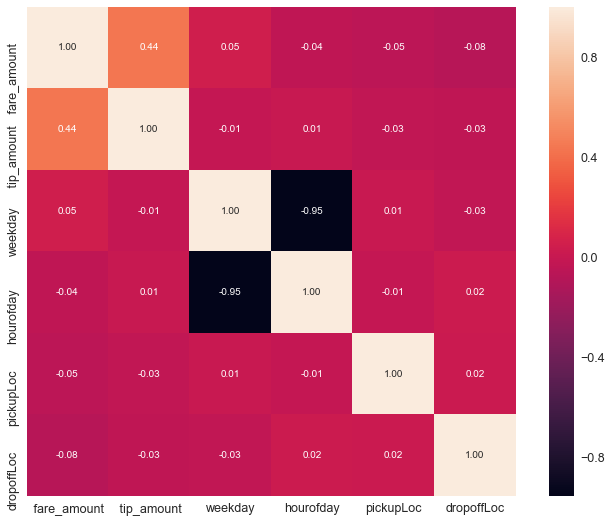

In [48]:
corrmat = training.corr()

k = 6
cols = corrmat.nlargest(k, ' fare_amount')[' fare_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [49]:
training.columns

Index([u' fare_amount', u' tip_amount', u'weekday', u'hourofday', u'pickupLoc',
       u'dropoffLoc'],
      dtype='object')

In [50]:
training.dtypes

 fare_amount    float64
 tip_amount     float64
weekday           int64
hourofday         int64
pickupLoc         int32
dropoffLoc        int32
dtype: object

In [51]:
training['weekday'] = training['weekday'].astype('category')
training['hourofday'] = training['hourofday'].astype('category')
training['pickupLoc'] = training['pickupLoc'].astype('category')
training['dropoffLoc'] = training['dropoffLoc'].astype('category')

In [52]:
training.dtypes

 fare_amount     float64
 tip_amount      float64
weekday         category
hourofday       category
pickupLoc       category
dropoffLoc      category
dtype: object

In [53]:
X = training.iloc[:,2:]
X.columns

Index([u'weekday', u'hourofday', u'pickupLoc', u'dropoffLoc'], dtype='object')

In [54]:
Y_fare = training.iloc[:,0]
Y_tip = training.iloc[:,1]

In [55]:
X = pd.get_dummies(X)

In [56]:
X.columns

Index([u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5',
       u'weekday_6', u'hourofday_1', u'hourofday_2', u'hourofday_3',
       u'hourofday_4',
       ...
       u'dropoffLoc_190', u'dropoffLoc_191', u'dropoffLoc_192',
       u'dropoffLoc_193', u'dropoffLoc_194', u'dropoffLoc_195',
       u'dropoffLoc_196', u'dropoffLoc_197', u'dropoffLoc_198',
       u'dropoffLoc_199'],
      dtype='object', length=428)

In [74]:
X_cv = X.as_matrix()[0:5000,:]


In [75]:
Y_fare_cv = Y_fare.tolist()[0:5000]
Y_tip_cv = Y_tip.tolist()[0:5000]

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

param_grid = [
 # {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [2,4,6,8], 'kernel': ['poly']},
 ]

clf = GridSearchCV(SVR(), param_grid, cv=4,
                       n_jobs=-1)

In [77]:
clf.fit(X_cv,Y_fare_cv)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'gamma': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
clf.best_params_

{'C': 10, 'gamma': 6, 'kernel': 'poly'}

In [79]:
clf.best_score_

0.3824552908723278

In [81]:
clf.cv_results_

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-package

{'mean_fit_time': array([11.69050002, 12.17424995, 11.90750009, 12.19125009, 13.31950003,
        16.83249998, 12.46525002, 12.33900005, 12.42500001, 13.39099991,
        11.98049992, 12.11799997, 13.38624996, 12.06024998, 12.14175004,
        12.25225002]),
 'mean_score_time': array([2.96224999, 3.08674997, 2.9745    , 3.57300001, 3.17399991,
        3.00649995, 3.05849993, 3.03125   , 2.98400003, 3.02875006,
        3.08050001, 2.96825004, 2.99250001, 3.19450003, 3.21524996,
        2.81849998]),
 'mean_test_score': array([0.38245527, 0.38245527, 0.38245529, 0.38245527, 0.38245527,
        0.38245527, 0.38245529, 0.38245527, 0.38245527, 0.38245527,
        0.38245529, 0.38245527, 0.38245527, 0.38245527, 0.38245529,
        0.38245527]),
 'mean_train_score': array([0.99868788, 0.99868787, 0.99868788, 0.99868787, 0.99868787,
        0.99868787, 0.99868788, 0.99868787, 0.99868787, 0.99868787,
        0.99868788, 0.99868787, 0.99868787, 0.99868787, 0.99868788,
        0.99868787]),
 'par

In [83]:
clf.scorer_

<function sklearn.metrics.scorer._passthrough_scorer>

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,30))
scores4 = cross_val_score(model, X2, y, cv=4,scoring='neg_mean_squared_error',n_jobs=-1)

param_grid = [
 # {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [2,4,6,8], 'kernel': ['poly']},
 ]

clf = GridSearchCV(SVR(), param_grid, cv=4,
                       n_jobs=-1)

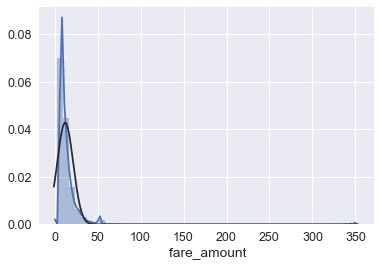

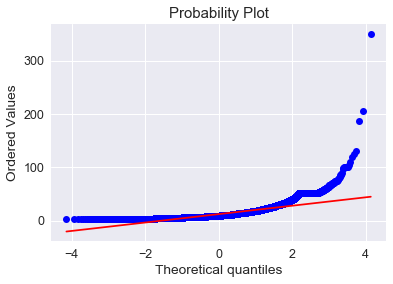

In [87]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats

columnName =  " fare_amount"
sns.distplot(full_tripdata[columnName], fit=norm);
fig = plt.figure()
res = stats.probplot(full_tripdata[columnName], plot=plt)

full_tripdata[columnName].

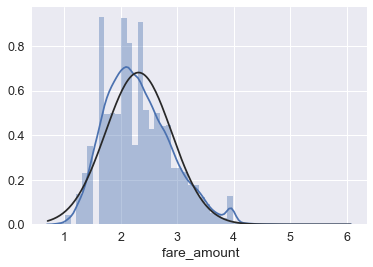

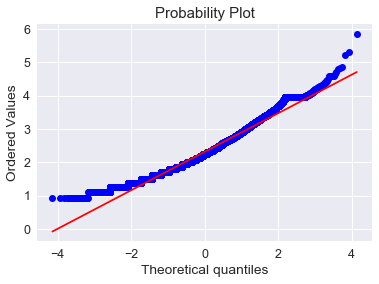

In [88]:
columnName =  " fare_amount"
sns.distplot(np.log(full_tripdata[columnName]), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(full_tripdata[columnName]), plot=plt)

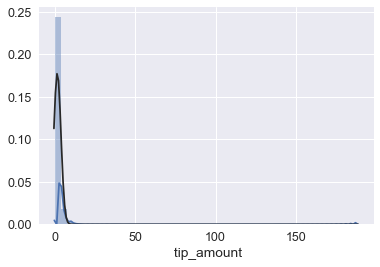

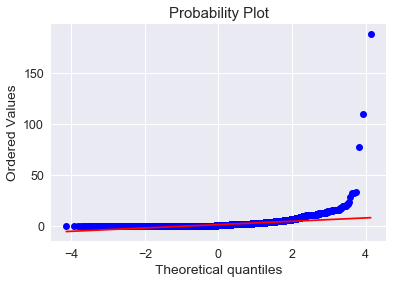

In [89]:
columnName =  " tip_amount"
sns.distplot(full_tripdata[columnName], fit=norm);
fig = plt.figure()
res = stats.probplot(full_tripdata[columnName], plot=plt)